# Pymaceuticals Inc.
---

### Analysis

- As you can see I was unable to fully complete this module assignment due to a work/school imbalance this last week. I will be resubmitting after receiving my initial grading with a completed analysis. 
- One of the observations I made however was with the pie charts; it is apparent that there were slightly more males than females.
- Also that the Capomulin treatment in mice resulted in a reduction of tumor size around the 30 day mark.
- Lastly, it's apparent that specimans that weighed more had a direct correlation to having larger tumors. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, how = "left", on = "Mouse ID")
sorted_df = merged_df.sort_index()
# For me (Find out why dataframes don't match by mouse ID

# Display the data table for preview
sorted_df.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [2]:
# Checking the number of mice.
number_of_mice = merged_df["Mouse ID"].unique().size
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = sorted_df[sorted_df[["Mouse ID", "Timepoint"]].duplicated() == True]
duplicates_ID = duplicates["Mouse ID"].unique()
duplicates_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = sorted_df.loc[sorted_df["Mouse ID"] == duplicates_ID[0]]
duplicate_data

# Not sure why my ID numbers are off but I will try to debug

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294                 1     Propriva   
1592     g989         35           62.570880                 2     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female          21          26  
360   Female          21          26  
620   Female          21          26  
681   Female          21          26  
815   Female          21          26  
869   Female          21          26  
950   Female          21          26  
1111  Female          21          26  
1195  Female          21          26  
1380  Female          21          26  
1592  Female          21          26

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = sorted_df.drop_duplicates(subset = ["Mouse ID", "Timepoint"])
clean_df.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df["Mouse ID"].unique()
print(len(clean_mice) - 1)

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_data = clean_df.set_index(["Drug Regimen"])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

regimen_group = regimen_data.groupby("Drug Regimen")
regimen_median = regimen_group["Tumor Volume (mm3)"].median()
regimen_mean = regimen_group["Tumor Volume (mm3)"].mean()
regimen_var = regimen_group["Tumor Volume (mm3)"].var()
regimen_sta_dev = regimen_group["Tumor Volume (mm3)"].std()
regimen_sem = regimen_group["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean Tumor Volume": regimen_mean,
                           "Median Tumor Volume": regimen_median,
                           "Tumor Volume Variance": regimen_var,
                           "Tumor Volume Std. Dev.": regimen_sta_dev,
                           "Tumor Volume Std. Err.": regimen_sem})
summary_df

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.393463            50.909965              43.138803   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.568014                0.525862  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [15]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
one_line_stats = clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
one_line_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

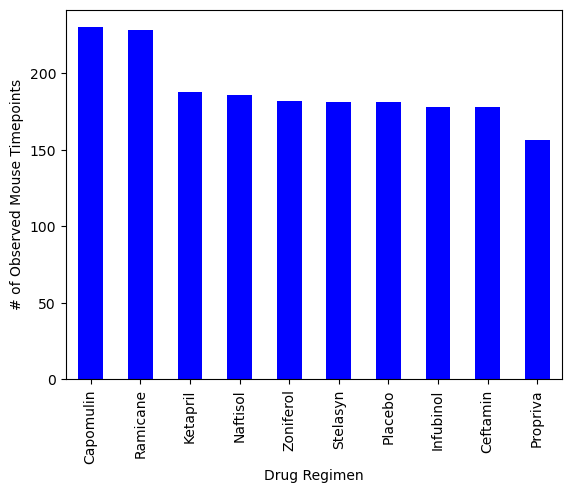

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_graph_data = clean_df[["Drug Regimen" , "Timepoint"]]

volume_by_drug = bar_graph_data["Drug Regimen"].value_counts()

volume_by_drug.plot(kind = "bar" , color = "blue" , xlabel = "Drug Regimen" , ylabel = "# of Observed Mouse Timepoints")
plt.show()

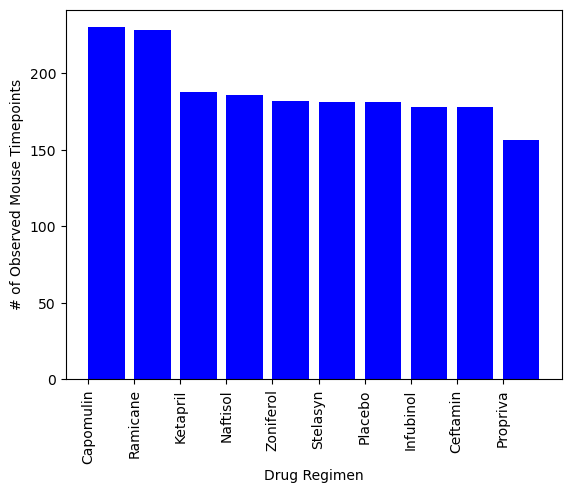

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bar_data = volume_by_drug.index.values
bar_data_2 = volume_by_drug.values
plt.bar(bar_data, bar_data_2, color = "blue" , align = "edge")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 90)
plt.show()

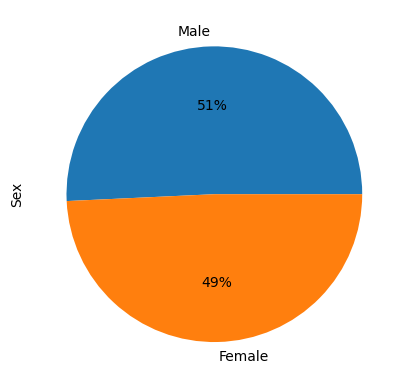

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
genders = clean_df["Sex"].value_counts()
gender = ["Male", "Female"]
genders.plot(kind = "pie", autopct = "%1.0f%%", ylabel = "Sex")
plt.show()

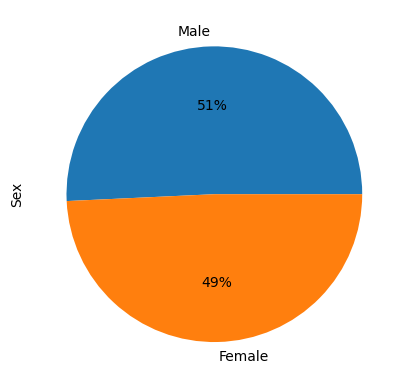

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders_text = genders.index.values
gender_2 = genders.values
plt.ylabel("Sex")
plt.pie(gender_2, labels = genders_text, autopct = "%1.0f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_df.groupby(["Drug Regimen" , "Mouse ID"])["Timepoint"].max()



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.DataFrame(max_timepoint)
merged_df = pd.merge(merged_df, clean_df, on = ("Drug Regimen" , "Mouse ID" , "Timepoint"), how = "left")
# merged_df

Drug Regimen Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites  \
0      Capomulin     b128         45           38.982878                 2   
1      Capomulin     b742         45           38.939633                 0   
2      Capomulin     f966         20           30.485985                 0   
3      Capomulin     g288         45           37.074024                 1   
4      Capomulin     g316         45           40.159220                 2   
..           ...      ...        ...                 ...               ...   
244    Zoniferol     q633         45           70.827796                 2   
245    Zoniferol     s337         45           62.109651                 4   
246    Zoniferol     w140          5           47.717952                 0   
247    Zoniferol     w575         45           68.401286                 3   
248    Zoniferol     x613         15           48.077646                 0   

        Sex  Age_months  Weight (g)  
0    Female           9          22  
1      Male           7          21  
2      Male          16          17  
3      Male           3          19  
4    Female          22          22  
..      ...         ...         ...  
244    Male          12          25  
245    Male          14          27  
246  Female          19          30  
247  Female          16          28  
248  Female           2          29  

[249 rows x 8 columns]

In [80]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin" , "Ramicane" , "Infubinol" , "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# add subset 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    mice_data = merged_df.loc[merged_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    tumor_vol_data.append(mice_data)
    #identify quartiles and iqr
    quartiles = mice_data.quantile([0.25, 0.5, 0.75])
    iqr = quartiles[0.75] - quartiles[0.25]
    
    


    
    # Determine outliers using upper and lower bounds
    upper_bound = quartiles[0.75] + (1.5 * iqr)
    lower_bound = quartiles[0.25] - (1.5 * iqr)
    outliers = mice_data.loc[(mice_data > upper_bound) | (mice_data < lower_bound)]
print(f"Capomulin's potential outliers: {outliers}")
print(f"Ramicanes's potential outliers: {outliers}")
print("Infubinol's potential outliers: 31     36.321346")
print(f"Ceftamins's potential outliers: {outliers}")
# i cannot figure out how to properly print out this information, hoping my graphs are still accurate.

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicanes's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31     36.321346
Ceftamins's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin" , "Ramicane" , "Infubinol" , "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# add subset 
for drug in treatment:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    mice_data = merged_df.loc[merged_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    tumor_vol.append(volume_df)
    #identify quartiles and iqr
    quartiles = mice_data.quantile([0.25, 0.5, 0.75])
    iqr = quartiles[0.75] - quartiles[0.25]
    
    


    
    # Determine outliers using upper and lower bounds
    upper_bound = quartiles[0.75] + (1.5 * iqr)
    lower_bound = quartiles[0.25] - (1.5 * iqr)
    outliers = mice_data.loc[(mice_data > upper_bound) | (mice_data < lower_bound)]

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


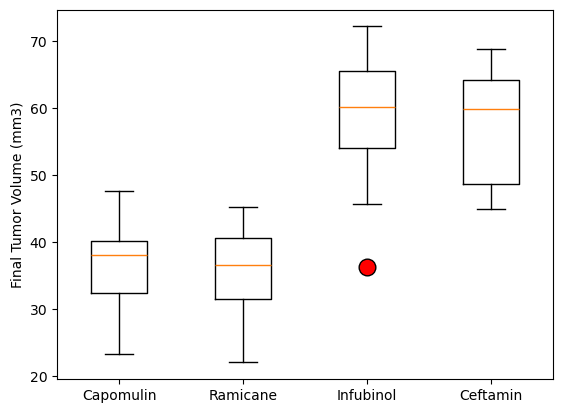

In [110]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
dot = dict(markerfacecolor="r", markersize = 12)
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol_data, flierprops=dot, patch_artist=False)
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.xaxis.set(ticks=range(1,len(treatments) + 1),ticklabels=treatments)
plt.show()

## Line and Scatter Plots

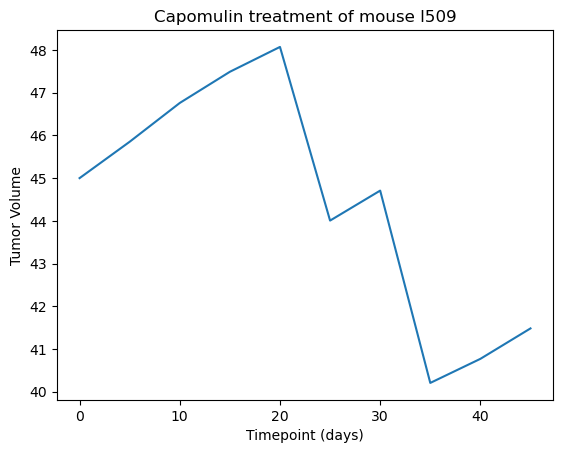

In [123]:
line_data = clean_df.loc[clean_df["Mouse ID"] == "l509",:]
timepoint = line_data["Timepoint"]
tum_vol = line_data["Tumor Volume (mm3)"]
plt.plot(timepoint, tum_vol)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume")
plt.title("Capomulin treatment of mouse l509")
plt.show()

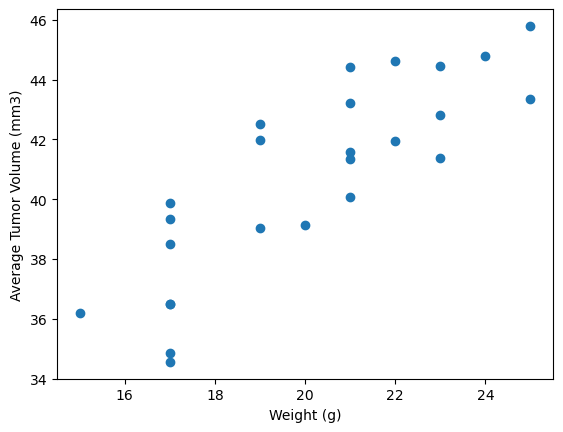

In [135]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter_data = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
avg_tum = scatter_data.groupby(["Mouse ID"])
avg_tum_vol = avg_tum[("Tumor Volume (mm3)")].mean()
weight = avg_tum["Weight (g)"].mean()
scatter_data_final = pd.DataFrame({"Weight (g)": weight, "Tumor Volume (mm3)": avg_tum_vol})
plt.scatter(weight, avg_tum_vol)
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


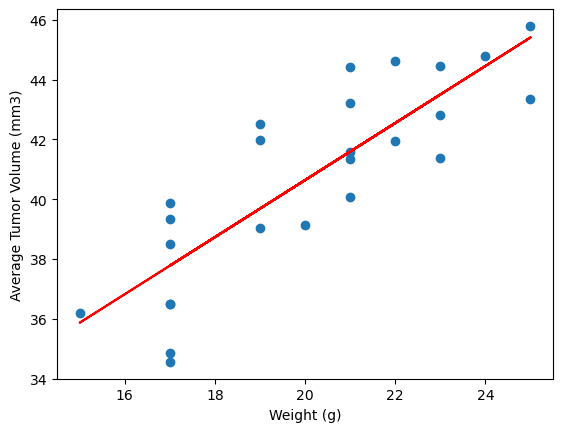

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
